Library

In [99]:
import numpy as np
import pandas as pd
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [43]:
# Download the latest version of the dataset
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
#print("Path to dataset files:", path)

# List files in the downloaded dataset folder
files = os.listdir(path)
#print("Files in dataset folder:", files)

# Find a CSV file in the dataset folder (assuming it contains at least one CSV file)
csv_file = None
for file in files:
    if file.lower().endswith('.csv'):
        csv_file = file
        break

if csv_file:
    csv_path = os.path.join(path, csv_file)
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path)
    print("DataFrame loaded successfully!")
else:
    print("No CSV file found in the dataset folder.")


DataFrame loaded successfully!


In [34]:
# Display dataset shape and first few rows
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Analyze Dataset

In [75]:
#df.describe() # looks like outlier on area > 15000
#df.isnull().sum()  #No null values
#df.nunique()
#df.corr() # Looks like no correlation within features 
#df.info()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [105]:
# Remove rows where 'area' is greater than 15000
df = df[df['area'] <= 15000]

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

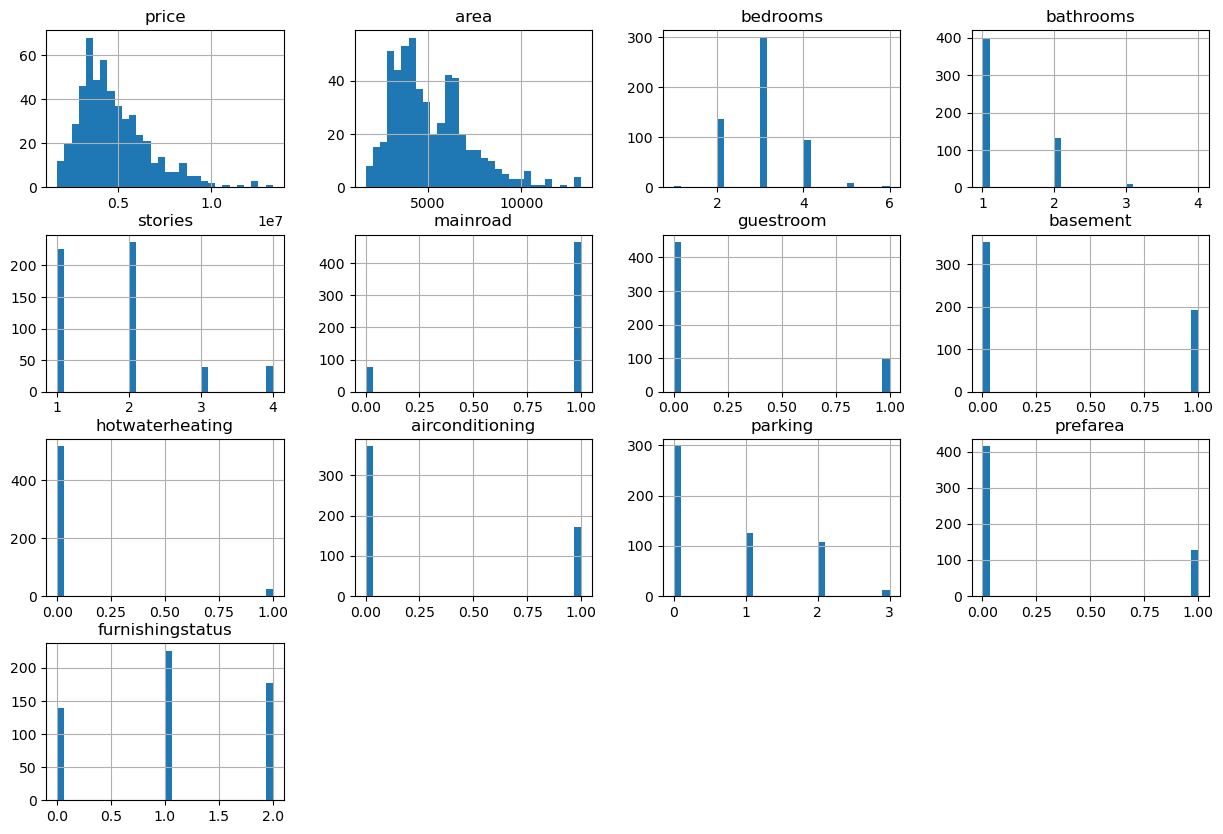

In [107]:
df.hist(bins=30, figsize=(15, 10))

Convert Categorial feature

In [72]:
df["mainroad"].replace({"yes": 1, "no": 0}, inplace=True)
df["guestroom"].replace({"yes": 1, "no": 0}, inplace=True)
df["basement"].replace({"yes": 1, "no": 0}, inplace=True)
df["hotwaterheating"].replace({"yes": 1, "no": 0}, inplace=True)
df["airconditioning"].replace({"yes": 1, "no": 0}, inplace=True)
df["prefarea"].replace({"yes": 1, "no": 0}, inplace=True)
#print(df["furnishingstatus"].unique())
df["furnishingstatus"].replace({"furnished": 0, "semi-furnished": 1, "unfurnished": 2}, inplace=True)

[0 1 2]


In [77]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


NameError: name 'plt' is not defined

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64


<Axes: xlabel='furnishingstatus'>

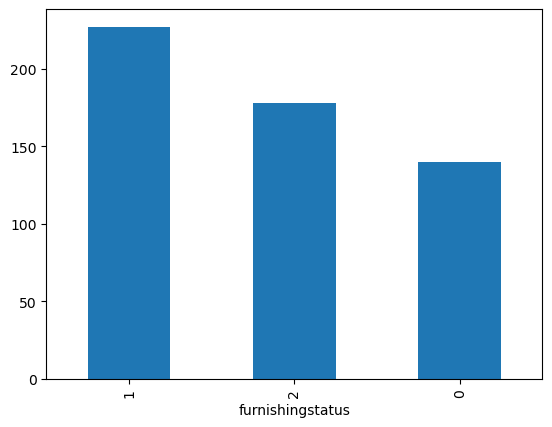

In [95]:
print(df['furnishingstatus'].value_counts())
df['furnishingstatus'].value_counts().plot(kind='bar')

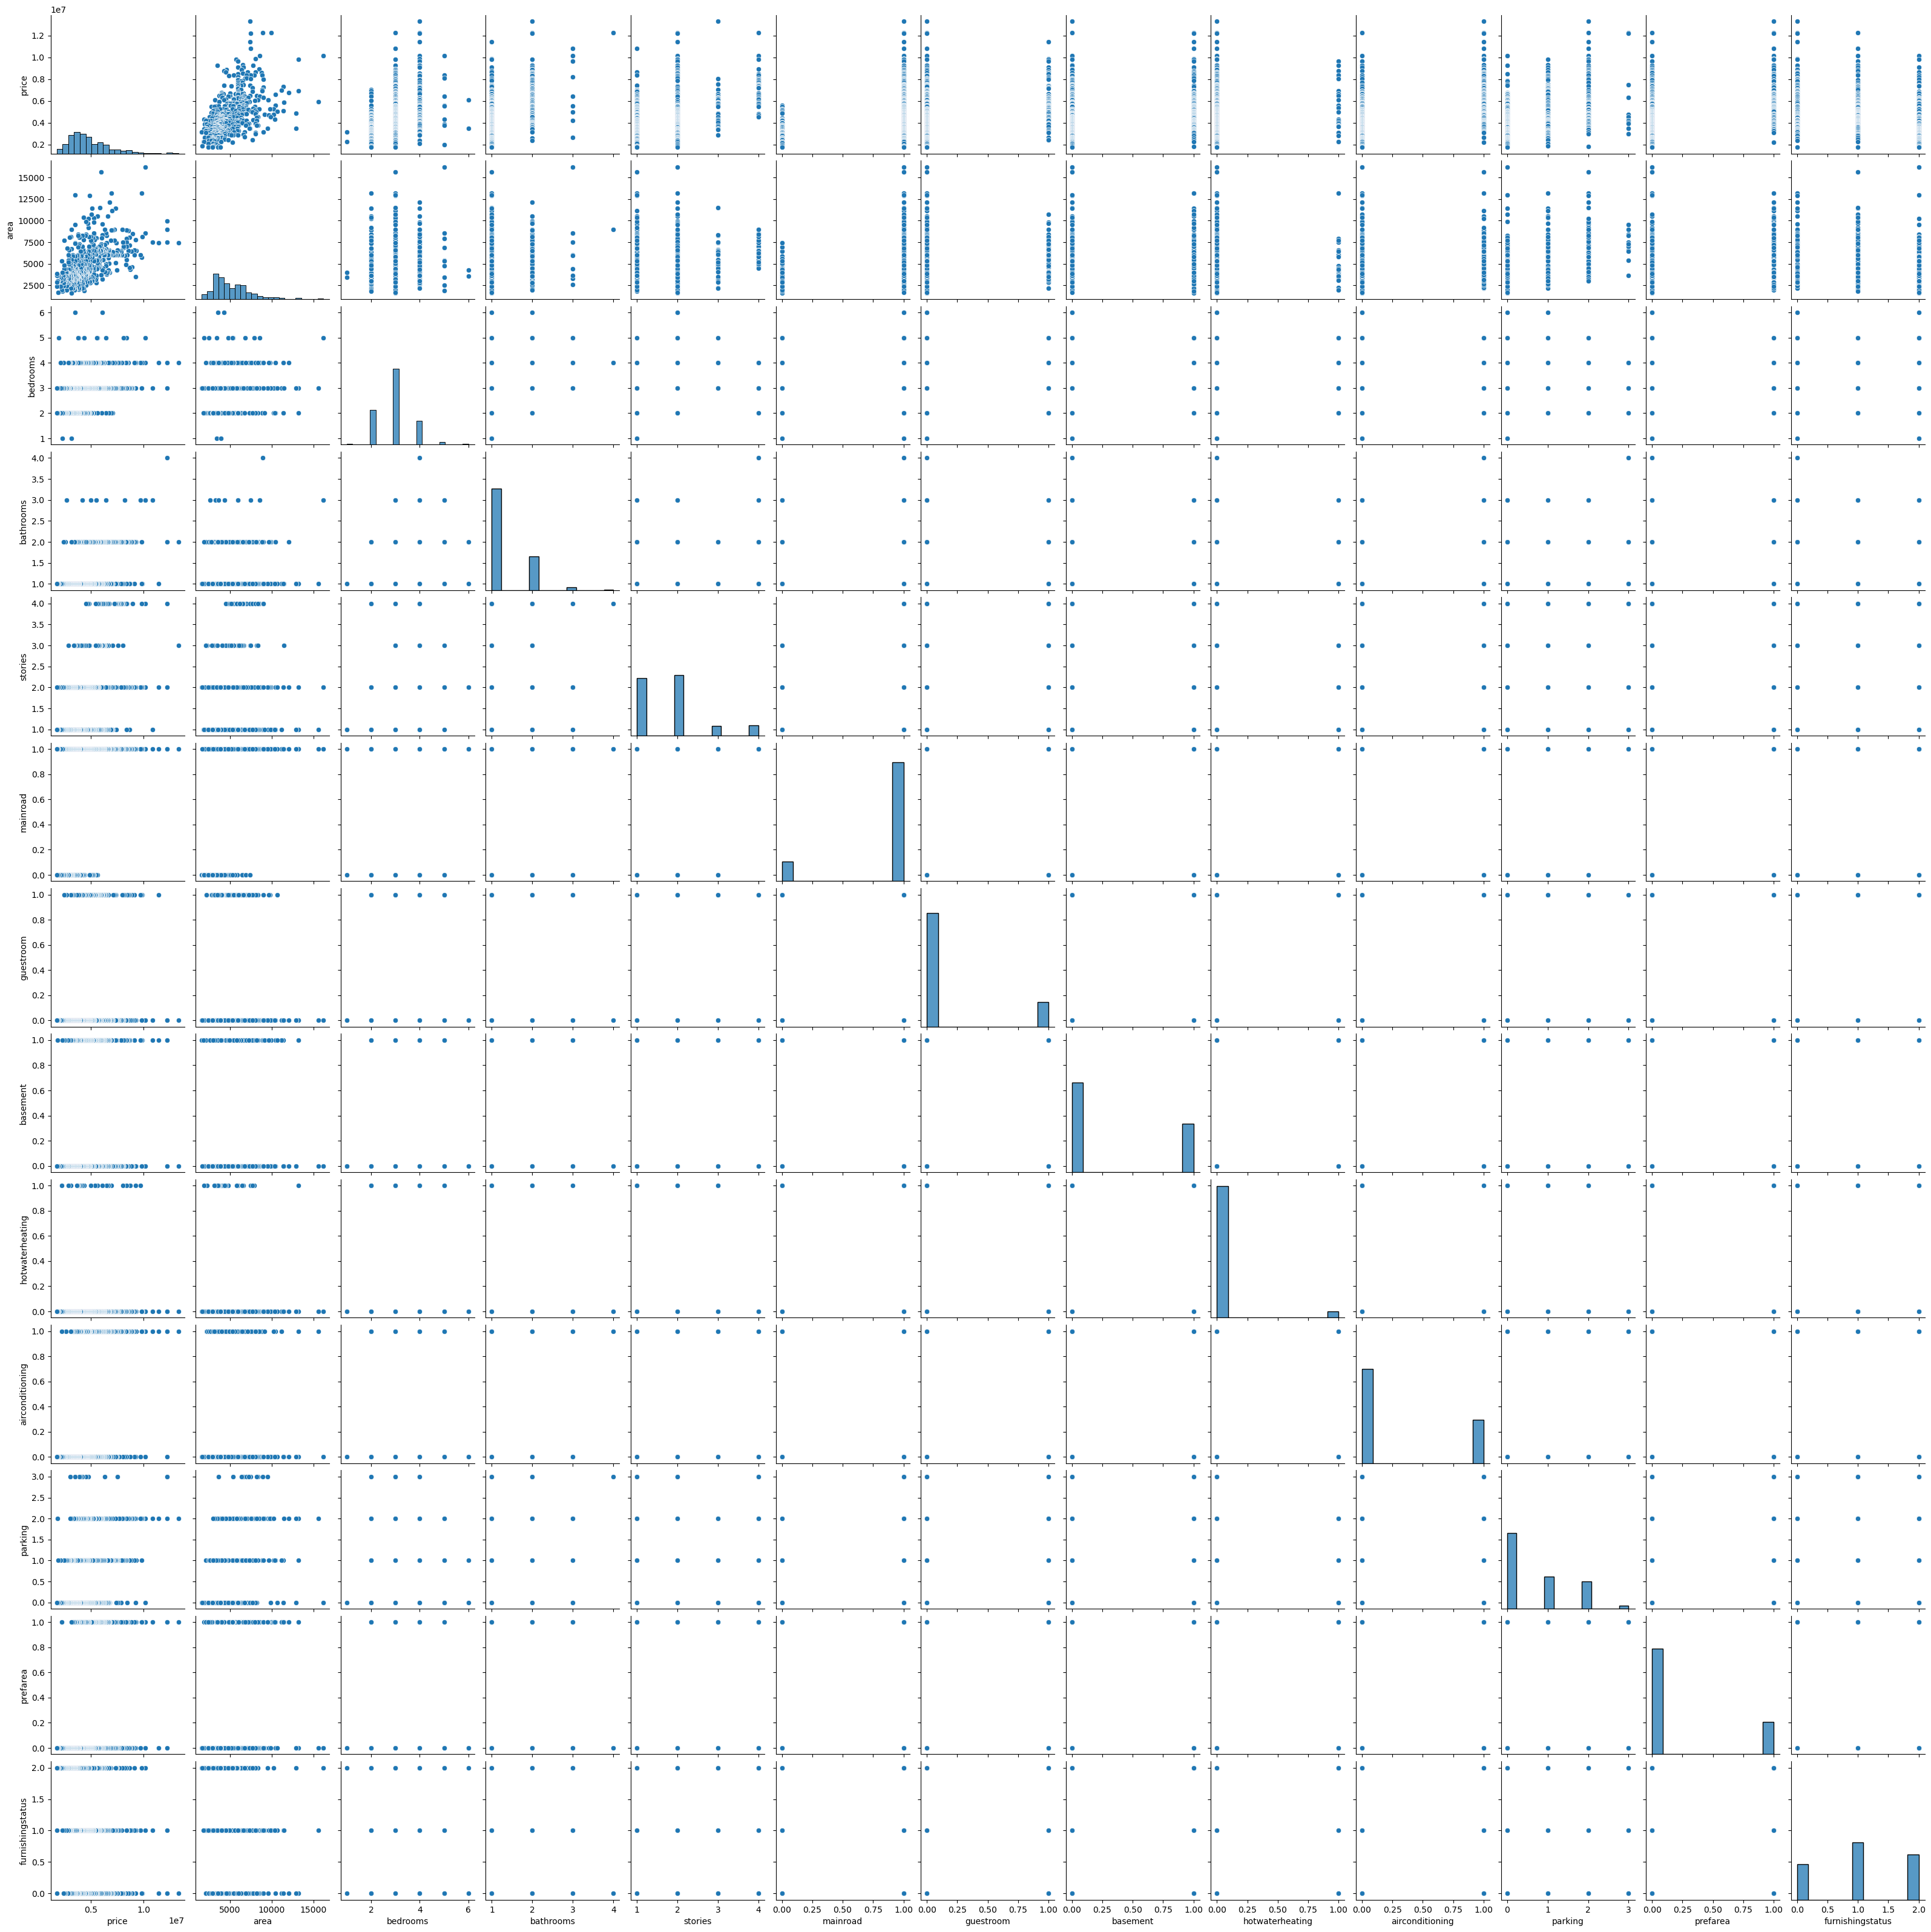

In [89]:
#Pairplot: Visualize pairwise relationships between features (useful for spotting correlations or clusters).
sns.pairplot(df)

<Axes: >

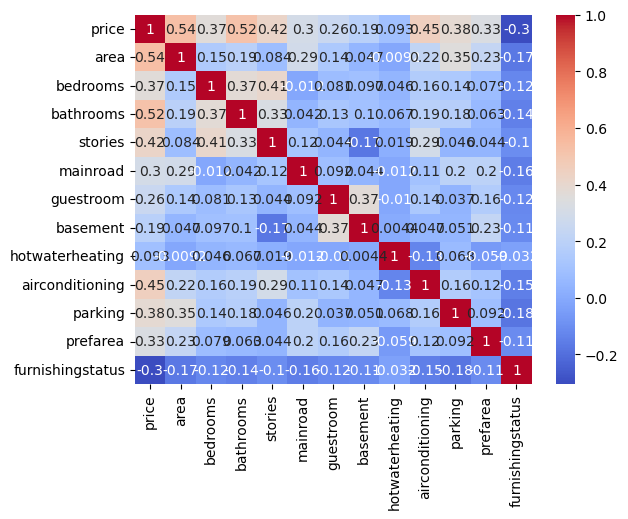

In [93]:
#Heatmap of Correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
y_log = np.log(df['SalePrice'])


Mean Squared Error: 1559652792717.42
Root Mean Squared Error: 1248860.60
R-squared: 0.67


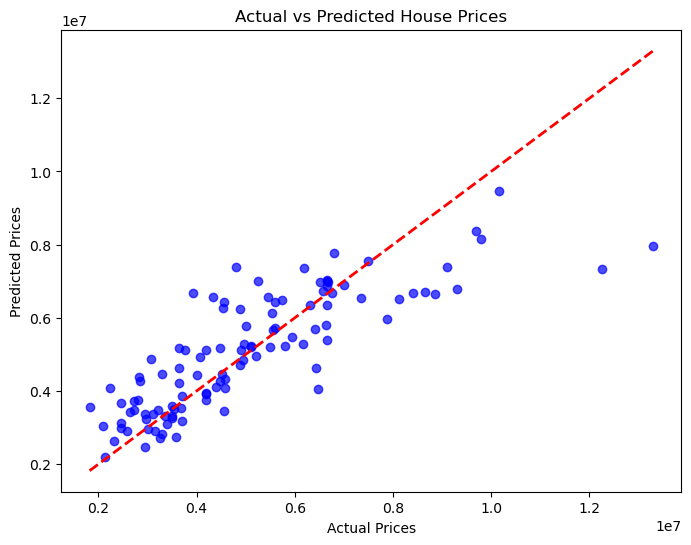

In [111]:
# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot Actual vs Predicted House Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Log Transform: Often, taking the logarithm of the price can help linear models perform better, because it reduces the impact of very large values.

Mean Squared Error: 0.05
Root Mean Squared Error: 0.22
R-squared: 0.72


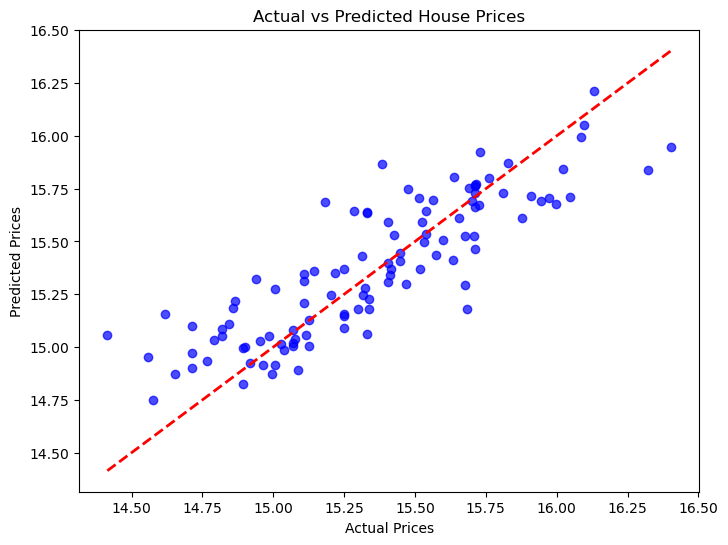

In [114]:
# Define features (X) and target (y)
X = df.drop(columns=['price'])
y_log = np.log(df['price'])

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot Actual vs Predicted House Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Overall, a 0.72 R² on log-transformed prices is a decent starting point for house price prediction. Keep experimenting with feature engineering, model selection, and tuning to see how much more you can improve!